### Gráficos de barras apilados
En este apartado se propone la elaboración de gráficas de barras apiladas para
representar los datos de infectados, fallecidos, hospitalizados e ingresos UCI, de
forma que se puedan visualizar de forma conjunta los datos de todas las comunidades
autónomas. Se propone además que se pueda realizar la visualización en el rango de
fechas especicado por el usuario.

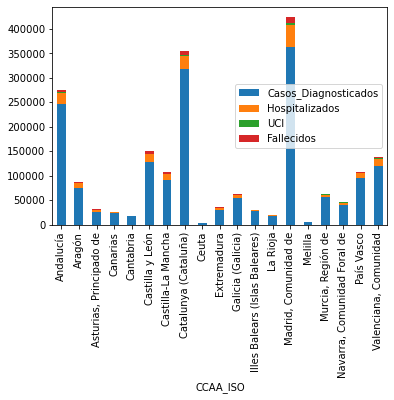

In [3]:
### IMPORT LIBRERIAS
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import numpy as np
####                                              FUNCIONES
### CARGA DICCIONARIO DE CC AA del fichero 
def carga_ccaa (nfic, dic):
    dic={}
    lis=[]
    fichero = open(nfic, "r",encoding="utf-8-sig")
    linea = fichero.readline().strip() # Leo registro cabecera
    if linea:
        linea = fichero.readline().strip()   ### Leo primera linea de datos
    while linea:                             ### cada registro (ccaa) un elemento del diccionario
        reg=linea.split(";")
        dic[reg[0]] = reg[2]
        linea = fichero.readline().strip()
    fichero.close()
    return dic

### Carga último fichero Datos_Casos_COVID19.csv  DataFrame casos
def carga_casos():      ### Carga fichero de casos por CCAA y día en DataFrame casos
    import pandas as pd
    pd.options.display.max_rows = 10
    casos = pd.read_csv('https://www.mscbs.gob.es/profesionales/saludPublica/ccayes/alertasActual/nCov/documentos/Datos_Casos_COVID19.csv',
                   encoding='latin-1',
                   skiprows=6,
#                   nrows=20,
                   sep=';')
    casos['Fecha']= pd.to_datetime(casos['Fecha'], format="%d-%m-%Y") ### Covierte string fecha en datetime
    casos=casos.set_index('Fecha')                                    ### pongo la fecha como indice
    return casos

###               PROGRAMA PRINCIPAL d_ccaa
###            CARGA DICCIONARIO DE CCAA d_ccaa
nfic="ccaa.csv"   #### fichero de claves de CCAA fichero "ccaa.csv"
dic_ccaa={}
d_ccaa=carga_ccaa (nfic, dic_ccaa)
#print(d_ccaa)

###  CARGA FICHERO DE CASOS COVID EN DATAFRAME df
df=carga_casos()
#print(carga_casos())

### Cambia codigo CCAA por nombre
### para ello crea diccionario de CCAA_ISO, nombre 
dic={}
for i in d_ccaa:
    dic['ES-'+i] = d_ccaa[i] 
df=df.replace(dic)   

df2=df.groupby(['Fecha','CCAA_ISO']).sum() #### Deja una unica fila por CCAA y Fecha


fecha1=datetime.strptime("01-03-2020", '%d-%m-%Y')
fecha2=datetime.strptime('10-12-2020', '%d-%m-%Y')
df3=df2[fecha1:fecha2]

df4=df3.groupby(['CCAA_ISO']).sum()   ###suma datos por CCAA

df4[['Casos_Diagnosticados','Hospitalizados', 'UCI','Fallecidos']].plot(kind='bar', stacked=True)
